# Battle of the New York Neighbourhoods

#### The following report will contain details for the Capstone Data Science course by IBM. 

## Introduction

Businessmen are always attempting to expand their wealth by either growing their current companies or expanding their current portfolio in order to retrieve more streams of income. Ideally this is always informed through a complex decision matrix on possible expansion strategies they wish to pursue. Business ideas are brain stormed, the top ideas are selected and business plans are written out on a high level. The top business plans are further developed and eliminated as the level of detail increases and finally out of this entire process, an idea becomes a project which is pursued. Through many iterations and blending of business ideas, the final idea may not have been an idea from the iteration process but something that was constructed during the iteration stage. One of the important elements in refining a business idea is always to understand a market and potential customers. There are many traits that characterise potential customers such as lifestyle, income bracket, culture, beliefs, location, etc. By identifying the potential customers and characterising them, a potential investor is able to decide where they wish to pursure their next endevour. This is one of the many ways Data Scientists are able to use data to understand communities and better suggest products/services that will indeed be successful due to the fact that it makes lives easier for people. The most successful businesses are the ones that improve the quality of life for people and bring the most value to their respective customers.

## Business Case

Our client owns businesses in the food industry across the world and have finally grown enough to infiltrate business into the New York area. The client hired our company to investigate various business opportunities in the new york area and provide them with our suggestions on the various business ventures they may partake in. As this is the first time that our client is looking into New York City, they require us to report on the various business opportunities (with specific interest in the food industry) we find and provide recommendations on what their strategy should be. As a Data Scientist within the company, we are required to understand the various areas within new york by understanding the current businesses that exist within new york and provide the strategy team with more locational information acccording to the neighbourhoods so that they can better support their business cases that they wish to recommend to the client.

## Data

Our data will make use of the FourSquare API and will gather the various types of food businesses that exist within the various neighborhoods of New York. These businesses will then be categorised according to the types of businesses that they are such as the various types of restaurants. The locational data of New York will be retrieved through a geojson file. An article off the internet will also be used to scrape Median Household Income (MHI) from respective neighborhoods from the internet as it will be interesting to observe the types of business that exist from neighbourhood trends due to income brackets. This will give us a better understanding of why some food businesses exist within neighbourhoods and better understand the picture of how businesses operate within new york. By observing the output of the study, the relationships between the neighbourhoods, income, and business will be seen easier which will help our client decide on the various businesses that need to be pursued according to the neighbourhood requirements as well as the various trends that exist between similar neighborhoods.

## Intermediate code to demonstrate the data that is used

This next block of code will import all the various modules that are required for the data analysis.

In [1]:
import pandas as pd
from pandas import DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from bs4 import BeautifulSoup
import requests
import folium
from geopy.geocoders import Nominatim
import json
from IPython.display import display
import matplotlib.cm as cm
import matplotlib.colors as colors
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


The following blocks of code will download the new york data and assign it to a variable which will contain a complex dictionary in the json file format. The following block creates a pandas dataframe containing the neighborhoods and their respective coordinates. The median household income is scraped off an article and merged with the neighborhoods coordinates data to create a data frame of neighborhoods with their median household income as well as their coordinates.

In [2]:
!wget -q -O nyu_2451_34572-geojson.json https://cocl.us/new_york_dataset
    
json_data = 'nyu_2451_34572-geojson.json'
with open(json_data, 'r') as f:
    newyork_data = json.load(f)

print("Done!")

Done!


In [3]:
neighborhoods_data = newyork_data['features']

# define the dataframe columns
column_names = ['Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

for data in neighborhoods_data:
    neighborhood_name = data['properties']['name']
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
neighborhoods.head()

,Neighborhood,Latitude,Longitude
0,Wakefield,40.894705,-73.847201
1,Co-op City,40.874294,-73.829939
2,Eastchester,40.887556,-73.827806
3,Fieldston,40.895437,-73.905643
4,Riverdale,40.890834,-73.912585


In [4]:
url = "https://www.homesnacks.net/richest-neighborhoods-in-new-york-129002/"

source = requests.get(url).text
soup = BeautifulSoup(source, 'lxml')
table = soup.find('table id=ranking-table')
table = soup.find(table)
#print(table)

headline = table.body.table.text
print(headline)





Rank
Neighborhood
Median Household Income<



1
Tribeca
$186,416


2
Carnegie Hill
$171,603


3
Battery Park
$169,476


4
Financial District
$158,605


5
North Sutton Area
$147,814


6
Upper East Side
$131,996


7
Cobble Hill
$131,817


8
Soho
$126,708


9
Greenwich Village
$121,594


10
Upper West Side
$121,502


11
Garment District
$120,573


12
Murray Hill
$117,763


13
West Village
$117,237


14
Midtown
$116,728


15
Carroll Gardens
$115,860


16
Park Slope
$115,042


17
Chelsea
$112,319


18
Gramercy
$111,522


19
Downtown
$110,356


20
Woodrow
$104,778


21
Boerum Hill
$104,198


22
Central Park
$101,158


23
Huguenot
$100,754


24
Annandale
$95,729


25
Prince’s Bay
$95,068


26
Todt Hill
$93,023


27
Spuyten Duyvil
$92,579


28
Great Kills
$92,004


29
Little Italy
$91,061


30
Clinton
$90,686


31
Ardon Heights
$87,757


32
Ettingville
$87,429


33
Rossville
$86,343


34
Riverdale
$86,341


35
Whitestone
$86,250


36
Westerleigh-Castleton
$85,305


37
Laurelton
$85,256


38


In [5]:
#This function takes the list that has been printed above and sorts it into a tables dataframe with the output being displayed below

new_table = headline.split("\n")

i = 8
j = i+1
k = j+1

nydf = pd.DataFrame([["", "", ""]], columns = ['Rank', 'Neighborhood', 'Median Household Income'])
while i < len(new_table)-3:
    nydf = nydf.append({'Rank': new_table[i], 'Neighborhood': new_table[j], 'Median Household Income': new_table[k]}, ignore_index=True)
    i = i + 5
    j = i + 1
    k = j + 1
    
nydf.head()

,Rank,Neighborhood,Median Household Income
0,,,
1,1,Tribeca,"$186,416"
2,2,Carnegie Hill,"$171,603"
3,3,Battery Park,"$169,476"
4,4,Financial District,"$158,605"


In [6]:
#This block of code merges the neighborhood locational data and Median Household INcome data into a single table

new_df = pd.merge(nydf, neighborhoods, on='Neighborhood')
new_df = new_df[['Rank','Neighborhood','Median Household Income','Latitude','Longitude']]
new_df = new_df.drop([85 , 86, 87, 88, 89, 90]) #Dropping Neighborhoods containing no Median Household Income values
new_df.head()

,Rank,Neighborhood,Median Household Income,Latitude,Longitude
0,1,Tribeca,"$186,416",40.721522,-74.010683
1,2,Carnegie Hill,"$171,603",40.782683,-73.953256
2,4,Financial District,"$158,605",40.707107,-74.010665
3,6,Upper East Side,"$131,996",40.775639,-73.960508
4,7,Cobble Hill,"$131,817",40.687920,-73.998561


# Methodology

Firstly, I would like to state my hypothesis. Due to no knowledge on New York City this may be difficult to be very specific on what it is we are looking for since we are just seeking understanding more than proving something. With this in mind, My hypothesis is:
- The food industry has a market in every neighborhood regardless of MHI as food is a basic need for humans
- There will be differences between the neighborhoods in terms of the types of food businesses that exist as poorer neighborhoods will cover mostly necessities whereas wealthier neighborhoods can afford a higher lifestyle standard
- Neighborhoods that do not share traits with their relevant MHI counterparts is a possible business opportunity as their may be market share that has not been utlised yet that can place it in simlar standing to neighborhoods in its MHI category.

In order to go about the data analysis, I will request food business data from the foursquare API for each neighborhood within a radius of 500m from the neighborhood's centre with a limit of 150 businesses. The distance and limit has been changed a few times with the results being saved to a csv file so that previously retrieved data can be reused without using the API again due to the limit on the foursquare account. The data is received in the form of a json file and the data extracted with a defined function to retrieve the business name, category and locational data.

To analyse the neighborhood data, we wish to see which are the top 10 most common places within each neighborhood. To do this, we use the one hot encoding method, group all the neighborhoods with each category of food businesses being stated as an average of the total amount of food businesses (normalising the data). This is done so that we can sort the data and allocate the top ten most common venues within each neighborhood. This table is then fed into a K means algorithm to see which types of neighborhoods are similar according to the normalised quantity of restaurants they find in the area. The number of clusters in the machine learning algorithm is an iterative process by changing the amount of clusters required and observing each results before deciding on an optimum. The MHI data will be added back to the clustered data and the results will be observed with hopefully differences being noted between various MHI brackets.

FOr further analysis to paint a deeper picture, the data will be manually split according to MHI with the three categories being Middle-Upper class(referred to as upper class for the rest of this report) Middle-Middle class (referred to as the middle class for the rest of this report) and Middle-lower class(referred to lower class for the rest of this report). The tallies of the top ten most common restaurants will be added up for each MHI bracket and the results will be observed and visualised.

Finally the results will be investigated and observations will be made that could aid other departments in making a suggestion for the client.


Exploring the Neighbohoods of New York and retrieving the venues that exist within a 500m radius of each neighborhood location.

In [7]:
print('The dataframe has {} neighborhoods.'.format(new_df.shape[0]))

The dataframe has 85 neighborhoods.


In [8]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [9]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, MHI, neighborhood in zip(new_df['Latitude'], new_df['Longitude'], new_df['Median Household Income'], new_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, MHI)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)
    #print(neighborhood, MHI)
    
map_newyork

In [10]:
#This block of code includes the foursquare API Data for my account.
CLIENT_ID = 'KKMQITJPTRI2XCNJST3QSL12LYXTTTO3F1Y1CTIQABPBYCK0' # your Foursquare ID
CLIENT_SECRET = 'CO5FQEJQGX4MLX2OXYTYREJ2V3NSZABLDD2CC2RFT15U2EDS' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KKMQITJPTRI2XCNJST3QSL12LYXTTTO3F1Y1CTIQABPBYCK0
CLIENT_SECRET:CO5FQEJQGX4MLX2OXYTYREJ2V3NSZABLDD2CC2RFT15U2EDS


This is a trial run for the API request

In [11]:
neighborhood_latitude = new_df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = new_df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = new_df.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

LIMIT = 100 # limit of number of venues returned by Foursquare API
section = 'food'
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&section={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        neighborhood_latitude, 
        neighborhood_longitude, 
        radius,
        section,
        LIMIT)
url # display URL

results = requests.get(url).json()
results

Latitude and longitude values of Tribeca are 40.721521967443216, -74.01068328559087.


{'meta': {'code': 200, 'requestId': '5eb44d201a4b0a0028f5bee4'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Tribeca',
  'headerFullLocation': 'Tribeca, New York',
  'headerLocationGranularity': 'neighborhood',
  'query': 'food',
  'totalResults': 66,
  'suggestedBounds': {'ne': {'lat': 40.72602197194322,
    'lng': -74.00475682341998},
   'sw': {'lat': 40.717021962943214, 'lng': -74.01660974776176}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4a6b17bff964a520fdcd1fe3',
       'name': "Wolfgang's Steakhouse",
       'location': {'address': '409 Greenwich St',
        'crossStreet': 'btwn Hubert & Beach',
        'lat': 40.72125237420

In [12]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

D:\Users\Matthew T\anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app


,name,categories,lat,lng
0,Wolfgang's Steakhouse,Steakhouse,40.721252,-74.010099
1,Wisefish Poké,Poke Place,40.721805,-74.009905
2,Locanda Verde,Italian Restaurant,40.719981,-74.010002
3,Sushi Azabu,Sushi Restaurant,40.722355,-74.009750
4,sweetgreen,Salad Place,40.721335,-74.009701
5,Interlude Cafe,Café,40.721168,-74.008428
6,The Greek,Greek Restaurant,40.723694,-74.009598
7,Smith & Mills,American Restaurant,40.720089,-74.009876
8,Bubby's,American Restaurant,40.719932,-74.008572
9,China Blue,Chinese Restaurant,40.724047,-74.010196


In [13]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
 
LIMIT = 150
section = 'food'
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&section={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            section,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

This block of code retrieved the foursquare data from the API but has been commented out as the data will then be read from a CSV instead of calling the FourSquare API each time it is run to save time as well as not using up unecessary calls.

In [14]:
#custom_radius = 500  #This value looks at the radius in metres for the getnearbyvenues function
#nearbyvenues = getNearbyVenues(names=new_df['Neighborhood'],
#                                   latitudes=new_df['Latitude'],
#                                  longitudes=new_df['Longitude'],
#                                   radius = custom_radius)
#print(nearbyvenues.shape)
#nearbyvenues.head()

In [15]:
#place_count = nearbyvenues.groupby('Neighborhood').count()
#merge = new_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
#place_count = place_count.join(merge.set_index('Neighborhood'), on='Neighborhood')
#place_count['Median Household Income'] = [z.strip('$') for z in place_count['Median Household Income']]
#place_count['Median Household Income'] = [y.replace(',','') for y in place_count['Median Household Income']]

#pd.to_numeric(place_count['Median Household Income'])
#place_count.head()       # check the last columns!

#pd.sort(columns = place_count['Median Household Income'], axis = 1)


In [16]:
#Saving the values as a file incase I reach my foursquare account limit. This is saved in the format off what the radius was for each neighborhood as well as the limit of venues I can retrieve.
#nearbyvenues.to_csv (r'C:\Users\Matthew T\DSSS LABS\PG ASsignments\Week 5\FOOD_radius_500_LIMIT_150.csv', index = False, header=True)

nearbyvenues = pd.read_csv("FOOD_radius_500_LIMIT_150.csv")

## Analyzing each neighborhood

Using the onehot encoding method and normalising the data in order to prepare it for K means clustering

In [17]:
# one hot encoding
venues_onehot = pd.get_dummies(nearbyvenues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
venues_onehot['Neighborhood'] = nearbyvenues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
venues_onehot = venues_onehot[fixed_columns]

venues_onehot.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Belgian Restaurant,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Chaat Place,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Creperie,Cuban Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Hot Dog Joint,Hotpot Restaurant,Hunan Restaurant,Indian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Mac & Cheese Joint,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Pakistani Restaurant,Peruvian Restaurant,Pet Café,Pizza Place,Poke Place,Polish Restaurant,Portuguese Restaurant,Poutine Place,Ramen Restaurant,Restaurant,Russian Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Snack Place,Soup Place,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Tonkatsu Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Tribeca,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Tribeca,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Tribeca,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Tribeca,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Tribeca,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
venues_onehot.shape


(3194, 127)

In [19]:
venues_grouped = venues_onehot.groupby('Neighborhood').mean().reset_index()
venues_grouped.head()
venues_grouped.shape
venues_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Belgian Restaurant,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Chaat Place,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Creperie,Cuban Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Hot Dog Joint,Hotpot Restaurant,Hunan Restaurant,Indian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Mac & Cheese Joint,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Pakistani Restaurant,Peruvian Restaurant,Pet Café,Pizza Place,Poke Place,Polish Restaurant,Portuguese Restaurant,Poutine Place,Ramen Restaurant,Restaurant,Russian Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Snack Place,Soup Place,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Tonkatsu Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Auburndale,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.083333,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000
1,Bay Ridge,0.000000,0.000000,0.039474,0.000000,0.000000,0.013158,0.000000,0.000000,0.000000,0.065789,0.039474,0.000000,0.000000,0.00,0.013158,0.000000,0.013158,0.000000,0.000000,0.013158,0.000000,0.000000,0.000000,0.013158,0.000000,0.00,0.078947,0.000000,0.000000,0.000000,0.000000,0.026316,0.013158,0.039474,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.039474,0.000000,0.000000,0.000000,0.000000,0.000000,0.013158,0.000000,0.000000,0.000000,0.000000,0.00,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013158,0.000000,0.000000,0.092105,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.065789,0.026316

In [20]:
num_top_venues = 5

for hood in venues_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = venues_grouped[venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
    
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

----Auburndale----
                 venue  freq
0  American Restaurant  0.17
1   Italian Restaurant  0.17
2        Deli / Bodega  0.17
3                Diner  0.08
4     Sushi Restaurant  0.08


----Bay Ridge----
                      venue  freq
0               Pizza Place  0.11
1        Italian Restaurant  0.09
2        Chinese Restaurant  0.08
3  Mediterranean Restaurant  0.07
4                Bagel Shop  0.07


----Baychester----
                  venue  freq
0            Donut Shop  0.22
1        Sandwich Place  0.11
2    Mexican Restaurant  0.11
3  Fast Food Restaurant  0.11
4           Pizza Place  0.11


----Bedford Park----
                venue  freq
0       Deli / Bodega  0.18
1  Chinese Restaurant  0.15
2         Pizza Place  0.13
3               Diner  0.10
4  Mexican Restaurant  0.10


----Bensonhurst----
                venue  freq
0  Chinese Restaurant  0.23
1         Pizza Place  0.13
2  Italian Restaurant  0.10
3          Donut Shop  0.06
4    Asian Restaurant  0.06



In [21]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = venues_grouped['Neighborhood']

for ind in np.arange(venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Auburndale,Deli / Bodega,American Restaurant,Italian Restaurant,Diner,Fast Food Restaurant,Sushi Restaurant,Food Truck,Noodle House,Korean Restaurant,Ethiopian Restaurant
1,Bay Ridge,Pizza Place,Italian Restaurant,Chinese Restaurant,Mediterranean Restaurant,Bagel Shop,Greek Restaurant,Fast Food Restaurant,Diner,Thai Restaurant,American Restaurant
2,Baychester,Donut Shop,Mexican Restaurant,Pizza Place,Fast Food Restaurant,Fried Chicken Joint,Spanish Restaurant,Sandwich Place,American Restaurant,Dumpling Restaurant,Eastern European Restaurant
3,Bedford Park,Deli / Bodega,Chinese Restaurant,Pizza Place,Mexican Restaurant,Diner,Fried Chicken Joint,Food Truck,Sandwich Place,Spanish Restaurant,Donut Shop
4,Bensonhurst,Chinese Restaurant,Pizza Place,Italian Restaurant,Asian Restaurant,Sushi Restaurant,Bakery,Donut Shop,Noodle House,Deli / Bodega,Café


# Cluster Each Neighborhood

In [22]:
# set number of clusters
kclusters = 6

grouped_clustering = venues_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 2, 2, 2, 0, 2, 2, 2, 2])

In [23]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

NY_merged = new_df

# Merging MHI income with the most common venues for each neighborhood
NY_merged = NY_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

#Converting the MHI data into a useable numeric value instead of the string it was previously in.
NY_merged['Median Household Income'] = [z.strip('$') for z in NY_merged['Median Household Income']]
NY_merged['Median Household Income'] = [y.replace(',','') for y in NY_merged['Median Household Income']]

NY_merged["Cluster Labels"] = pd.to_numeric(NY_merged["Cluster Labels"])

NY_merged = NY_merged.drop(NY_merged.index[31])
NY_merged = NY_merged.drop(NY_merged.index[21])
NY_merged # check the last columns!

,Rank,Neighborhood,Median Household Income,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Tribeca,186416,40.721522,-74.010683,0.0,American Restaurant,Italian Restaurant,Café,Deli / Bodega,Greek Restaurant,Sandwich Place,Burger Joint,Bakery,French Restaurant,Food Truck
1,2,Carnegie Hill,171603,40.782683,-73.953256,0.0,Pizza Place,Café,Bakery,Italian Restaurant,Sushi Restaurant,Japanese Restaurant,French Restaurant,Restaurant,Fast Food Restaurant,Mexican Restaurant
2,4,Financial District,158605,40.707107,-74.010665,0.0,Sandwich Place,Salad Place,Italian Restaurant,Pizza Place,American Restaurant,Café,Food Truck,Deli / Bodega,Steakhouse,Mexican Restaurant
3,6,Upper East Side,131996,40.775639,-73.960508,0.0,Italian Restaurant,American Restaurant,Pizza Place,French Restaurant,Bakery,Food Truck,Diner,Deli / Bodega,Mexican Restaurant,Chinese Restaurant
4,7,Cobble Hill,131817,40.687920,-73.998561,0.0,Deli / Bodega,Thai Restaurant,Pizza Place,Bakery,Italian Restaurant,Chinese Restaurant,Mexican Restaurant,Bagel Shop,Restaurant,French Restaurant
5,8,Soho,126708,40.722184,-74.000657,0.0,Italian Restaurant,Café,Mediterranean Restaurant,Sandwich Place,Seafood Restaurant,French Restaurant,Pizza Place,Sushi Restaurant,Mexican Restaurant,Bakery
6,9,Greenwich Village,121594,40.726933,-73.999914,0.0,Italian Restaurant,Café,Sushi Restaurant,Vegetarian / Vegan Restaurant,Pizza Place,Food Truck,Sandwich Place,Chinese Restaurant,Bakery,Mediterranean Restaurant
7,10,Upper West Side,121502,40.787658,-73.977059,0.0,Italian Restaurant,Indian Restaurant,Pizza Place,Café,Bakery,Seafood Restaurant,Breakfast Spot,Sushi Restaurant,Restaurant,Bagel Shop
8,12,Murray Hill,117763,40.748303,-73.978332,0.0,Korean Restaurant,Japanese Restaurant,Deli / Bodega,Sandwich Place,Mediterranean Restaurant,Pizza Place,Burger Joint,American Restaurant,Chinese Restaurant,Restaurant
9,12,Murray Hill,117763,40.764126,-73.812763,0.0,Korean Restaurant,Japanese Restaurant,Deli / Bodega,Sandwich Place,Mediterranean Restaurant,Pizza Place,Burger Joint,American Restaurant,Chinese Restaurant,Restaurant


In [24]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


#add markers to the map
markers_colors = []
for lat, lon, poi, cluster, MHI in zip(NY_merged['Latitude'], NY_merged['Longitude'], NY_merged['Neighborhood'], NY_merged['Cluster Labels'], NY_merged['Median Household Income']):
    label = folium.Popup(str(poi) + str(cluster) + "  MHI:" + MHI, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
#print(rainbow)      
map_clusters


In [25]:
NY_merged["Median Household Income"] = pd.to_numeric(NY_merged["Median Household Income"])
cluster_number = 0
df = NY_merged.loc[NY_merged['Cluster Labels'] == cluster_number, NY_merged.columns[[1] + list(range(2, NY_merged.shape[1]))]]
mean = 0
count = 0

for x in df['Median Household Income']:
    mean = mean + int(x)
    count += 1
    #print(count)
    #print(mean)
mean = mean/count 
print("the mean for cluster {}".format(cluster_number), mean)
df = df.drop(['Latitude','Longitude'],  axis=1)
print(df.shape)
df

the mean for cluster 0 100745.02702702703
(37, 13)


,Neighborhood,Median Household Income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Tribeca,186416,0.0,American Restaurant,Italian Restaurant,Café,Deli / Bodega,Greek Restaurant,Sandwich Place,Burger Joint,Bakery,French Restaurant,Food Truck
1,Carnegie Hill,171603,0.0,Pizza Place,Café,Bakery,Italian Restaurant,Sushi Restaurant,Japanese Restaurant,French Restaurant,Restaurant,Fast Food Restaurant,Mexican Restaurant
2,Financial District,158605,0.0,Sandwich Place,Salad Place,Italian Restaurant,Pizza Place,American Restaurant,Café,Food Truck,Deli / Bodega,Steakhouse,Mexican Restaurant
3,Upper East Side,131996,0.0,Italian Restaurant,American Restaurant,Pizza Place,French Restaurant,Bakery,Food Truck,Diner,Deli / Bodega,Mexican Restaurant,Chinese Restaurant
4,Cobble Hill,131817,0.0,Deli / Bodega,Thai Restaurant,Pizza Place,Bakery,Italian Restaurant,Chinese Restaurant,Mexican Restaurant,Bagel Shop,Restaurant,French Restaurant
5,Soho,126708,0.0,Italian Restaurant,Café,Mediterranean Restaurant,Sandwich Place,Seafood Restaurant,French Restaurant,Pizza Place,Sushi Restaurant,Mexican Restaurant,Bakery
6,Greenwich Village,121594,0.0,Italian Restaurant,Café,Sushi Restaurant,Vegetarian / Vegan Restaurant,Pizza Place,Food Truck,Sandwich Place,Chinese Restaurant,Bakery,Mediterranean Restaurant
7,Upper West Side,121502,0.0,Italian Restaurant,Indian Restaurant,Pizza Place,Café,Bakery,Seafood Restaurant,Breakfast Spot,Sushi Restaurant,Restaurant,Bagel Shop
8,Murray Hill,117763,0.0,Korean Restaurant,Japanese Restaurant,Deli / Bodega,Sandwich Place,Mediterranean Restaurant,Pizza Place,Burger Joint,American Restaurant,Chinese Restaurant,Restaurant
9,Murray Hill,117763,0.0,Korean Restaurant,Japanese Restaurant,Deli / Bodega,Sandwich Place,Mediterranean Restaurant,Pizza Place,Burger Joint,American Restaurant,Chinese Restaurant,Restaurant


In [26]:
cluster_number = 1
df = NY_merged.loc[NY_merged['Cluster Labels'] == cluster_number, NY_merged.columns[[1] + list(range(2, NY_merged.shape[1]))]]
mean = 0
count = 0

for x in df['Median Household Income']:
    mean = mean + int(x)
    count += 1
    #print(count)
    #print(mean)
mean = mean/count 
print("the mean for cluster {}".format(cluster_number), mean)
df = df.drop(['Latitude','Longitude'],  axis=1)
print(df.shape)
df

the mean for cluster 1 83127.5
(2, 13)


,Neighborhood,Median Household Income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Whitestone,86250,1.0,Deli / Bodega,Wings Joint,Food Court,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,English Restaurant
34,South Beach,80005,1.0,Deli / Bodega,Wings Joint,Food Court,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,English Restaurant


In [27]:
cluster_number = 2
df = NY_merged.loc[NY_merged['Cluster Labels'] == cluster_number, NY_merged.columns[[1] + list(range(2, NY_merged.shape[1]))]]
mean = 0
count = 0

for x in df['Median Household Income']:
    mean = mean + int(x)
    count += 1
    #print(count)
    #print(mean)
mean = mean/count 
print("the mean for cluster {}".format(cluster_number), mean)
df = df.drop(['Latitude','Longitude'],  axis=1)
print(df.shape)
df

the mean for cluster 2 54986.0243902439
(41, 13)


,Neighborhood,Median Household Income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Spuyten Duyvil,92579,2.0,Thai Restaurant,Asian Restaurant,Fast Food Restaurant,Pizza Place,Food,American Restaurant,Eastern European Restaurant,Dumpling Restaurant,Egyptian Restaurant,Food Court
26,Rossville,86343,2.0,Pizza Place,Bagel Shop,BBQ Joint,Deli / Bodega,American Restaurant,Chinese Restaurant,Food,English Restaurant,Filipino Restaurant,Fast Food Restaurant
32,Midland Beach,82585,2.0,Deli / Bodega,Pizza Place,Restaurant,Chinese Restaurant,Café,Food,Halal Restaurant,Himalayan Restaurant,Diner,Donut Shop
33,Rosebank,82109,2.0,Pizza Place,Mexican Restaurant,Deli / Bodega,Italian Restaurant,Bakery,Restaurant,Breakfast Spot,Eastern European Restaurant,Sandwich Place,Chinese Restaurant
36,Middle Village,76088,2.0,Chinese Restaurant,Bakery,Deli / Bodega,Spanish Restaurant,South American Restaurant,Sushi Restaurant,Sandwich Place,Burrito Place,Japanese Restaurant,Italian Restaurant
39,Queens Village,73128,2.0,Mexican Restaurant,Food,Bakery,Restaurant,Diner,Donut Shop,Sandwich Place,Chinese Restaurant,Filipino Restaurant,Latin American Restaurant
40,Utopia,71438,2.0,Deli / Bodega,Afghan Restaurant,Bakery,Donut Shop,Pizza Place,Korean Restaurant,South American Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
42,Canarsie,69844,2.0,Food,Deli / Bodega,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Thai Restaurant,Eastern European Restaurant,Dumpling Restaurant,Egyptian Restaurant,Donut Shop
43,Eastchester,69654,2.0,Caribbean Restaurant,Deli / Bodega,Diner,Pizza Place,Seafood Restaurant,Chinese Restaurant,Bakery,Donut Shop,Fast Food Restaurant,Dumpling Restaurant
44,Baychester,69222,2.0,Donut Shop,Mexican Restaurant,Pizza Place,Fast Food Restaurant,Fried Chicken Joint,Spanish Restaurant,Sandwich Place,American Restaurant,Dumpling Restaurant,Eastern European Restaurant


In [28]:
cluster_number = 3
df = NY_merged.loc[NY_merged['Cluster Labels'] == cluster_number, NY_merged.columns[[1] + list(range(2, NY_merged.shape[1]))]]
mean = 0
count = 0

for x in df['Median Household Income']:
    mean = mean + int(x)
    count += 1
    #print(count)
    #print(mean)
mean = mean/count 
print("the mean for cluster {}".format(cluster_number), mean)
df = df.drop(['Latitude','Longitude'],  axis=1)
print(df.shape)
df

the mean for cluster 3 86341.0
(1, 13)


,Neighborhood,Median Household Income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,Riverdale,86341,3.0,Food Truck,Wings Joint,Food Court,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,English Restaurant


In [29]:
cluster_number = 4
df = NY_merged.loc[NY_merged['Cluster Labels'] == cluster_number, NY_merged.columns[[1] + list(range(2, NY_merged.shape[1]))]]
mean = 0
count = 0

for x in df['Median Household Income']:
    mean = mean + int(x)
    count += 1
    #print(count)
    #print(mean)
mean = mean/count 
print("the mean for cluster {}".format(cluster_number), mean)
df = df.drop(['Latitude','Longitude'],  axis=1)
print(df.shape)
df

the mean for cluster 4 85256.0
(1, 13)


,Neighborhood,Median Household Income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Laurelton,85256,4.0,Caribbean Restaurant,Deli / Bodega,Wings Joint,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,English Restaurant


In [30]:
cluster_number = 5
df = NY_merged.loc[NY_merged['Cluster Labels'] == cluster_number, NY_merged.columns[[1] + list(range(2, NY_merged.shape[1]))]]
mean = 0
count = 0

for x in df['Median Household Income']:
    mean = mean + int(x)
    count += 1
    #print(count)
    #print(mean)
mean = mean/count 
print("the mean for cluster {}".format(cluster_number), mean)
df = df.drop(['Latitude','Longitude'],  axis=1)
print(df.shape)
df

the mean for cluster 5 64184.0
(1, 13)


,Neighborhood,Median Household Income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
51,Howland Hook,64184,5.0,Italian Restaurant,Wings Joint,Food Court,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,English Restaurant


# Further Analysis of the Data

### Intermediate Discussion
Looking at the clusters, there appears to be a a division between the Upper class and the rest of the data set with a few outliers. The clusters 1, 3, 4 and 5 appear to be very similar to each other if you consider that there are about 7 similarities between them in their most common venues but due to the requirement of having 6 clusters the computer may have seperated them to suit this requirement. The final number of clusters were chosen at 6. This was an iterative process of selecting clusters from 1 to 15 and observing the results. Using 6 clusters was found to be the most helpful in noticing somewhat a split between Upper class and the rest MHI brackets. Unfortunately this does not really tell a convincing story in terms of why that is or how to suggest a businessman to suggest a restaurant or food shop to open in an area. All we know for now is that there seems to be a preferential difference between what Upper class households prefer and everyone else.

One interesting point to mention is that there are a few outliers which means there may be business opportunity or available market share for the client to gain with these outliers. These outliers can be seen as opportunity as they have been placed into the 'incorrect' cluster due to the lack of certain food businesses that exist within the neighborhood that may push it back into its correct cluster if they were there. This is not concrete but one of the considerations that can come from clustering.

To further develop the analysis, I will be splitting the data in terms of income namely; Upper class; Middle class and Lower class. The three splits were defined with a Median Household Income (MHI) of more than 100 000; between 100 000 and 50 000; and less than 50 000 (all MHI values are in dollars). I will then be building a frequency table using only the 10 most common venues for each Income segment and observe those results.

The following block of code will create the three dataframes for each MHI split.

In [31]:
df_upper = NY_merged[NY_merged['Median Household Income'] >= 100000]
df_middle = NY_merged[NY_merged['Median Household Income'] >= 50000]
df_middle = df_middle[df_middle['Median Household Income'] < 100000]
df_lower = NY_merged[NY_merged['Median Household Income'] < 50000]
df_upper.head()

,Rank,Neighborhood,Median Household Income,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Tribeca,186416,40.721522,-74.010683,0.0,American Restaurant,Italian Restaurant,Café,Deli / Bodega,Greek Restaurant,Sandwich Place,Burger Joint,Bakery,French Restaurant,Food Truck
1,2,Carnegie Hill,171603,40.782683,-73.953256,0.0,Pizza Place,Café,Bakery,Italian Restaurant,Sushi Restaurant,Japanese Restaurant,French Restaurant,Restaurant,Fast Food Restaurant,Mexican Restaurant
2,4,Financial District,158605,40.707107,-74.010665,0.0,Sandwich Place,Salad Place,Italian Restaurant,Pizza Place,American Restaurant,Café,Food Truck,Deli / Bodega,Steakhouse,Mexican Restaurant
3,6,Upper East Side,131996,40.775639,-73.960508,0.0,Italian Restaurant,American Restaurant,Pizza Place,French Restaurant,Bakery,Food Truck,Diner,Deli / Bodega,Mexican Restaurant,Chinese Restaurant
4,7,Cobble Hill,131817,40.687920,-73.998561,0.0,Deli / Bodega,Thai Restaurant,Pizza Place,Bakery,Italian Restaurant,Chinese Restaurant,Mexican Restaurant,Bagel Shop,Restaurant,French Restaurant


In [32]:
df_middle.head()

,Rank,Neighborhood,Median Household Income,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,27,Spuyten Duyvil,92579,40.881395,-73.917190,2.0,Thai Restaurant,Asian Restaurant,Fast Food Restaurant,Pizza Place,Food,American Restaurant,Eastern European Restaurant,Dumpling Restaurant,Egyptian Restaurant,Food Court
23,28,Great Kills,92004,40.549480,-74.149324,0.0,Pizza Place,Italian Restaurant,Bagel Shop,Mexican Restaurant,Spanish Restaurant,Falafel Restaurant,Chinese Restaurant,Bakery,Cafeteria,Sandwich Place
24,29,Little Italy,91061,40.719324,-73.997305,0.0,Chinese Restaurant,Italian Restaurant,Café,Vietnamese Restaurant,Bakery,Mediterranean Restaurant,Pizza Place,Malay Restaurant,Thai Restaurant,Seafood Restaurant
25,30,Clinton,90686,40.759101,-73.996119,0.0,Italian Restaurant,Deli / Bodega,American Restaurant,Restaurant,Sandwich Place,Thai Restaurant,Mexican Restaurant,Pizza Place,Chinese Restaurant,Seafood Restaurant
26,33,Rossville,86343,40.549404,-74.215729,2.0,Pizza Place,Bagel Shop,BBQ Joint,Deli / Bodega,American Restaurant,Chinese Restaurant,Food,English Restaurant,Filipino Restaurant,Fast Food Restaurant


In [33]:
df_lower.head()

,Rank,Neighborhood,Median Household Income,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
65,95,Lower East Side,49246,40.717807,-73.980890,2.0,Pizza Place,Chinese Restaurant,Café,Bakery,Deli / Bodega,Diner,Sandwich Place,Mexican Restaurant,Latin American Restaurant,Japanese Restaurant
66,96,Corona,49118,40.742382,-73.856825,2.0,Mexican Restaurant,Bakery,Italian Restaurant,Latin American Restaurant,Restaurant,Donut Shop,Pizza Place,Sandwich Place,Deli / Bodega,Chinese Restaurant
67,97,Parkchester,48567,40.837938,-73.856003,2.0,Pizza Place,Deli / Bodega,Chinese Restaurant,American Restaurant,Asian Restaurant,Food,Food Truck,Sandwich Place,Caribbean Restaurant,Mexican Restaurant
68,98,Flushing,47960,40.764454,-73.831773,0.0,Korean Restaurant,Chinese Restaurant,Bakery,Hotpot Restaurant,Deli / Bodega,Asian Restaurant,Food,Sushi Restaurant,Szechuan Restaurant,Café
69,100,Inwood,47582,40.867684,-73.921210,2.0,Pizza Place,Restaurant,Café,Mexican Restaurant,Spanish Restaurant,American Restaurant,Bakery,Chinese Restaurant,Donut Shop,Caribbean Restaurant


The following blocks of code will:
- Make empty dictionaries
- run through each column from the 1st to the 10th most common venue
- the dictionary will either set a new key as 1 or add 1 to each key that already exists
- The dictionary is converted into a pandas dataframe
- The frequency values are sorted from most common to least common
- The table index is reset
- The ten most common appearances are displayed

All commented code were used as troubleshooting the code and understanding what each section does.

In [34]:
upper = {}
for column in df_upper.columns[6:]:
    #print(column)
    for key , value in df_upper[column].items():
        #print(key, value)
        if value in upper.keys():
            upper[value] = upper[value] + 1   
        else:
            upper[value] = 1
#print(upper)
df_U = DataFrame(list(upper.items()),columns = ['Type of place','Frequency']) #Creates a Pandas dataframe from the frequency dictionary
df_U.sort_values(by=['Frequency'], inplace=True, ascending=False) #Sorts Frequency values in decending order
df_U.reset_index(drop=True, inplace=True)  #Resets index for Frequency Table
df_U.head(30)

,Type of place,Frequency
0,Pizza Place,16
1,Italian Restaurant,16
2,Bakery,13
3,Sandwich Place,13
4,American Restaurant,12
5,Deli / Bodega,12
6,French Restaurant,11
7,Mexican Restaurant,11
8,Café,10
9,Chinese Restaurant,8


In [35]:
middle = {}
for column in df_middle.columns[6:]:
    #print(column)
    for key , value in df_middle[column].items():
        #print(key, value)
        if value in middle.keys():
            middle[value] = middle[value] + 1   
        else:
            middle[value] = 1
#print(middle)
df_M = DataFrame(list(middle.items()),columns = ['Type of place','Frequency']) #Creates a Pandas dataframe from the frequency dictionary
df_M.sort_values(by=['Frequency'], inplace=True, ascending=False) #Sorts Frequency values in decending order
df_M.reset_index(drop=True, inplace=True)  #Resets index for Frequency Table
df_M.head(30)

,Type of place,Frequency
0,Pizza Place,27
1,Deli / Bodega,27
2,Chinese Restaurant,26
3,Donut Shop,20
4,Bakery,19
5,Italian Restaurant,17
6,Diner,16
7,Dumpling Restaurant,14
8,Mexican Restaurant,14
9,Eastern European Restaurant,13


In [36]:
lower = {}
for column in df_lower.columns[6:]:
    #print(column)
    for key , value in df_lower[column].items():
        #print(key, value)
        if value in lower.keys():
            lower[value] = lower[value] + 1   
        else:
            lower[value] = 1
#print(lower)
df_L = DataFrame(list(lower.items()),columns = ['Type of place','Frequency']) #Creates a Pandas dataframe from the frequency dictionary
df_L.sort_values(by=['Frequency'], inplace=True, ascending=False) #Sorts Frequency values in decending order
df_L.reset_index(drop=True, inplace=True)  #Resets index for Frequency Table
df_L.head(30)

,Type of place,Frequency
0,Pizza Place,18
1,Deli / Bodega,16
2,Chinese Restaurant,16
3,Bakery,15
4,Mexican Restaurant,12
5,Café,11
6,Latin American Restaurant,10
7,Sandwich Place,9
8,Spanish Restaurant,9
9,Donut Shop,7


# Results
The results are summarised below. A map showing the various neighborhoods and the clusters that formed because of it shown according to colour. The frequency Histograms are shown to indicate the popularity of the various types of places for each MHI bracket.

In [37]:
map_clusters

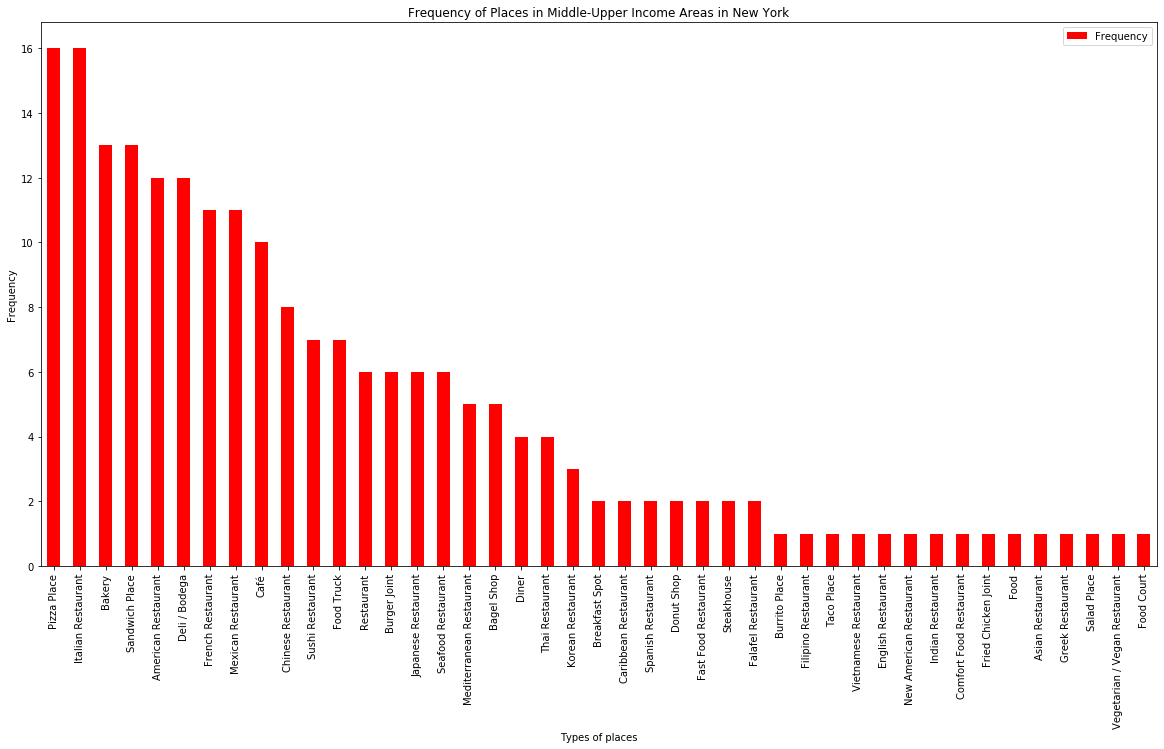

In [38]:
df = df_U
df.plot(kind='bar', figsize=(20, 10),  color='red')

plt.xlabel('Types of places') # add to x-label to the plot
plt.ylabel('Frequency') # add y-label to the plot
plt.title('Frequency of Places in Middle-Upper Income Areas in New York') # add title to the plot
plt.xticks(range(len(df['Type of place'])), df['Type of place'], size='medium')
plt.show()

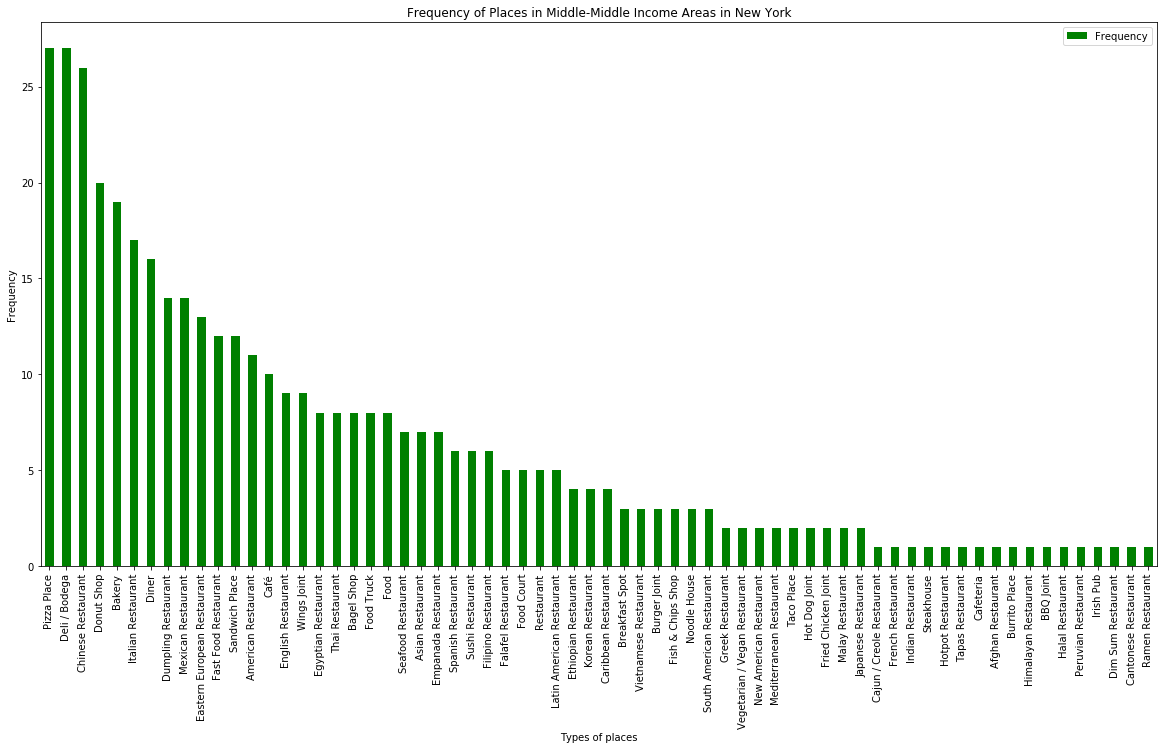

In [39]:
df = df_M
df.plot(kind='bar', figsize=(20, 10),  color='green')

plt.xlabel('Types of places') # add to x-label to the plot
plt.ylabel('Frequency') # add y-label to the plot
plt.title('Frequency of Places in Middle-Middle Income Areas in New York') # add title to the plot
plt.xticks(range(len(df['Type of place'])), df['Type of place'], size='medium')
plt.show()

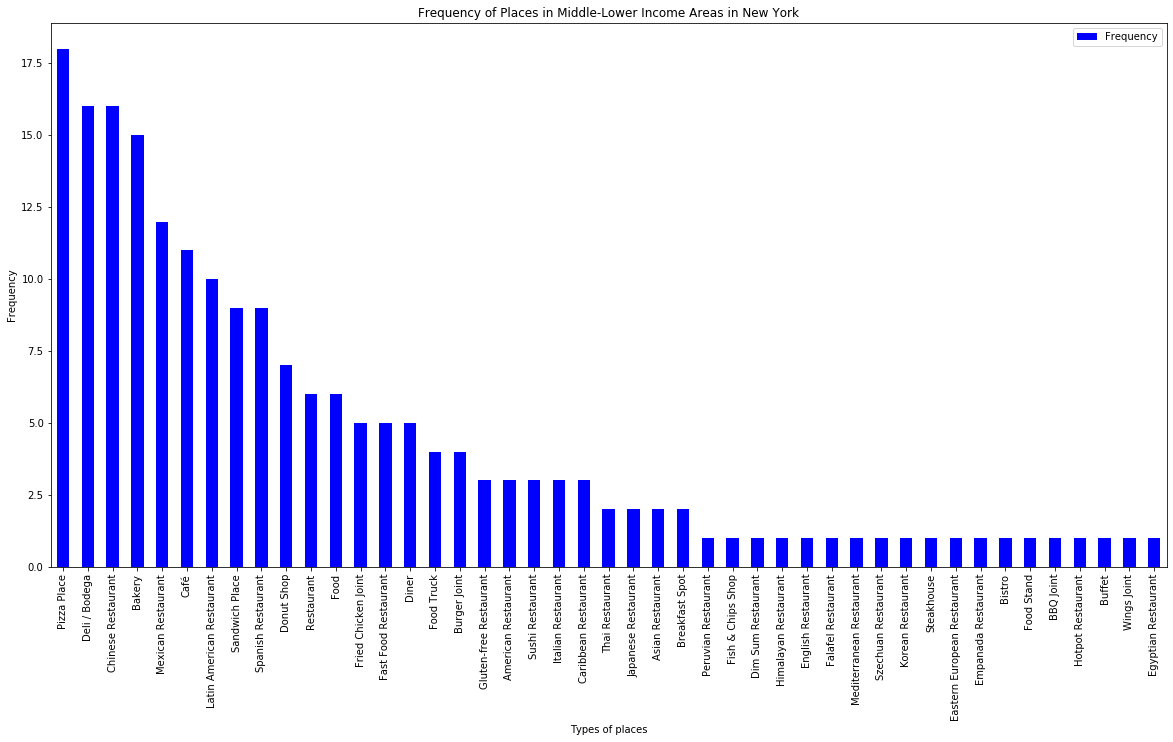

In [40]:
df = df_L
df.plot(kind='bar', figsize=(20, 10),  color='blue')

plt.xlabel('Types of places') # add to x-label to the plot
plt.ylabel('Frequency') # add y-label to the plot
plt.title('Frequency of Places in Middle-Lower Income Areas in New York') # add title to the plot
plt.xticks(range(len(df['Type of place'])), df['Type of place'], size='medium')
plt.show()

# Discussion
The following section will discuss each observation that was noticed from the data analysis. This is followed by comments and recommendations.

**Initial Remarks**

When making observations with the used data, there are many assumptions that are made. One of the biggest assumptions is that the Demand in the various areas is met by the supply from the various food businesses. It is very possible that these businesses exist and are struggling to keep up with monthly expenses which may be as a result of its economic climate it finds itself in (something that is required to be understood further in the business case development for the client). For this immediate analysis, we assume that these businesses are indeed profitable and that they all are part of fulfilling the demand for types of food venues in their respective areas.
### Observation #1
Most importantly to note- **EVERYONE LOVES PIZZA**. Regardless of your income bracket, you will always want and eat pizza. It appears that Pizza businesses cater for all MHI brackets but what would be interesting to see is the quality and price points of these pizza places in their various MHI points.
### Observation #2
One of the interesting observations to make is that for the Middle-upper class, Deli/Bodega's does not appear to have as a high a demand as it only makes a combined 5th and 6th place in popularity. This suggests that Middle-upper income areas eat out more often or order takeouts more often due to maybe not having the time to prepare food themselves and clean up thereafter. Living Standards Measure (LSM) is a marketing research tool that groups people according to their living standards and MHI is one of the indexes that help define the LSM. With this in mind, it also suggests that Middle-upper class residents having a living standard that allows them to eat out more often as this is a lifestyle they can easily afford.
### Observation #3
Another Observation is that the Middle-upper class does not contain many fast food restaurants as it comes in at a combined 22nd place with only two areas with fast food restaurants in there top 10 most common places. This is surprising as fast food restaurants were expected to be very common across all three MHI splits. It did not come in the top 10 for any MHI bracket with the highest being 11th place for Middle-middle class and combined 13th place for Middle-lower class. It does however combine 13th and 14th place with 'Fried chicken joint' which could be a more specific form of fast food (i.e KFC) which would create a combined frequency of 10 which may push it higher into combined 6th place. Again, deeper analysis to understand this would be to actually look at the various restaurants that were highlighted as 'Fried Chicken Joint' and see if it can be interpreted as Fast food.
### Observation #4
Middle-Upper neighborhoods have an increased number of sit down restaurants as oppose to pop in donut shops, fast food restaurants and deli's. Which again suggests that if a client wishes to build a sit down restuarant that contains a specific type of cuisine, the Middle-Upper class is most likely the market to move forward with. Otherwise, quick pop in stores that do not necessarily have large seating areas are much more desireable between the Middle-Middle and Middle-Lower class brackets. Depending on the lavishness of the product (i.e  Cupcakes are more lavish than pies), this would determine in which of the final two class areas to move into.
### Observation #5
All in all, all food types are mostly accomodated for in every area. The differences that are mentioned provide insight into differences that can be noted to ensure a successful startup business but in no way has the data shown that different food types are only found in certain areas. The data infact suggests that every food business type can be found at any price bracket which somewhat gives freedom for the client to decide which bracket he/she wishes start in and then follow the laid out rules to increase the probabibility of success.
### Further Comments
Another point to make for this discussion is that this research is not absolute and I would recommend further investigation as this does data does not allow for sufficient insight to suggest a business venture to someone wishing to open a food business in New York. The data does tell a story but it needs to be verified and investigated further to have a deeper understanding of the New York food business horizon. Many assumptions are made throughout this discussion which is good for initial overview and understanding of this situation but digging deeper makes this insight more concrete or even provide a different picture to what the data is saying.
#### Recommendations
- Assumptions need to be verified.
- The quality of restaurants and their price points should be accounted for and trends should be observed.
- Going through the  data and seeing if there are overlaps between various categories and observe better ways to categorise businesses.
- Another way to analyse the data would be to have one big request of all the food businesses in New york instead of looking at the radius from the centre of the neighborhood. This would reduce the possibility of overlaps as well as accomodating possible businesses that may have been left out.
- To understand the culture of New Yorkers better, a New Yorker should be brought in that may verify claims and provide a deeper insight as to what he/she thinks about the data or why things may be the way they are.
- what would also be interesting to see is whether restaurants are chain stores in the various areas or independantly owned. Depending on the clients wishes, a chain store may be preferable as oppose to starting from scratch but in a business environment where clients prefer the unique experiences of non-chain restaurants, this may be preferable.

Lastly, these recommendations would exist under a perfect scenario without infinite resources. Unfortunately in real life, resources are limited which means that retrieving the above data and analysing it may be an intensive endevour to embark on in terms of time and money to acquire such data and information. Therefore it is up to the project manager to liase with the client to understand the required depth of analysis that is of sufficient standard to make a judgement without depleting resources.

# Conclusion

Our client has asked our company to investigate the food business environment within New York. This report is a subsection of the investigation looking purely at the businesses that currently exist as well as the MHI of the residents closest to these businesses. The analysis has noted that there are business opportunities across all MHI brackets and that each MHI bracket has a different set of requirements that would increase the likelihood of success in a specific area if a business is opened. Finally, this report is not complete and should be considered in unison with other research that is also conducted in order to better understand the business horizon and hence make a strong business case for the client.